In [1]:
import numpy as np
import pandas as pd

In [15]:
#Reading dataset
dataset=pd.read_csv("Data.csv")
dataset.head()

,ID,Age,Income,Gender,Marital Status,Buys
0,1,< 21,High,Male,Single,No
1,2,< 21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,> 35,Medium,Male,Single,Yes
4,5,> 35,Low,Female,Single,Yes


In [3]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,5].values
#Perform label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()

In [4]:
x = x.apply(LabelEncoder().fit_transform)
print x

    ID  Age  Income  Gender  Marital Status
0    0    1       0       1               1
1    1    1       0       1               0
2    2    0       0       1               1
3    3    2       2       1               1
4    4    2       1       0               1
5    5    2       1       0               0
6    6    0       1       0               0
7    7    1       2       1               1
8    8    1       1       0               0
9    9    2       2       0               1
10  10    1       2       0               0
11  11    0       2       1               0
12  12    0       0       0               1
13  13    2       2       1               0


In [5]:
from sklearn.tree import DecisionTreeClassifier
regressor=DecisionTreeClassifier()
regressor.fit(x.iloc[:,1:5],y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
#Predict value for the given expression
x_pred=np.array([1,1,0,0])

In [7]:
y_pred=regressor.predict([x_pred])
print "Prediction:", y_pred

Prediction: ['Yes']


In [10]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

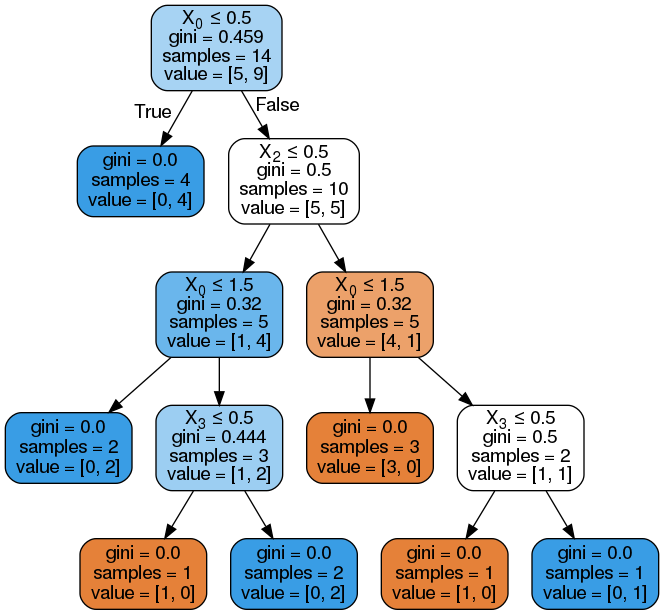

In [14]:
# Creating Object of StringIO
dataobj=StringIO()
#Object will be given to this export_graphviz
export_graphviz(regressor, out_file=dataobj, filled=True, rounded=True, special_characters=True)
#Creating graph
graph=pydotplus.graph_from_dot_data(dataobj.getvalue())
Image(graph.create_png())